<a href="https://colab.research.google.com/github/Vaishnavi741/STOCK-PREDICTION12/blob/main/ARIMA_FINAL_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 import pandas as pd


In [2]:
dir="/content/drive/MyDrive/Colab Notebooks/Aug31_Price_series (1).xlsx"
data=pd.read_excel(dir,index_col='time HHMMSS')
data

,Spot price ltp NIFTY50,Price of Synthetic option derived future,price NIFTY23AUGFUT
time HHMMSS,,,
09:15:01,19375.55,19358.529510,19359.125
09:15:10,19361.80,19338.013578,19340.300
09:15:51,19358.50,19341.881400,19342.100
09:16:31,19374.25,19355.645595,19355.450
09:17:11,19374.25,19355.705598,19356.450
...,...,...,...
15:26:59,19262.45,19253.006319,19251.850
15:27:39,19272.85,19253.304164,19252.500
15:28:19,19283.15,19254.661953,19253.200


<Axes: xlabel='time HHMMSS'>

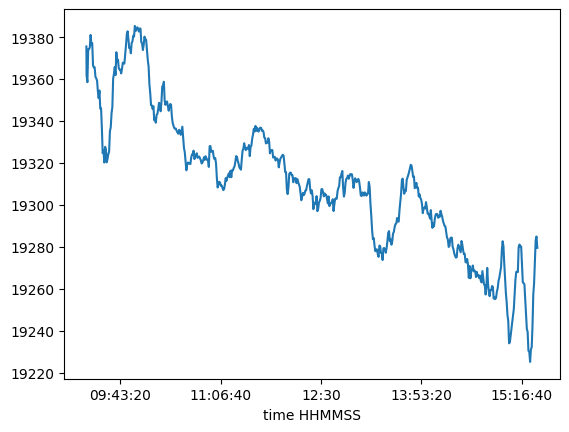

In [3]:
data['Spot price ltp NIFTY50'].plot()

In [4]:
import numpy as np
import pandas as pd
from numpy import math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline
scaler=StandardScaler()
X=data[['Spot price ltp NIFTY50']]
x_train, x_test = train_test_split(X,test_size=0.2, shuffle=False,random_state = 0)
X_train_normalized = scaler.fit_transform(x_train)
X_test_normalized = scaler.transform(x_test)

In [5]:
#Check for stationarity
from statsmodels.tsa.stattools import adfuller
def adf_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")

     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
     if dftest[1]<0.05:
       print("The data is stationary ")
     else:
      print("The data is not stationary")
adf_test(data['Spot price ltp NIFTY50'])

1. ADF :  -1.4100524813169208
2. P-Value :  0.5774474571303025
3. Num Of Lags :  9
4. Num Of Observations Used For ADF Regression: 548
5. Critical Values :
	 1% :  -3.442339408568417
	 5% :  -2.866828612425054
	 10% :  -2.5695866531248335
The data is not stationary


<Axes: xlabel='time HHMMSS'>

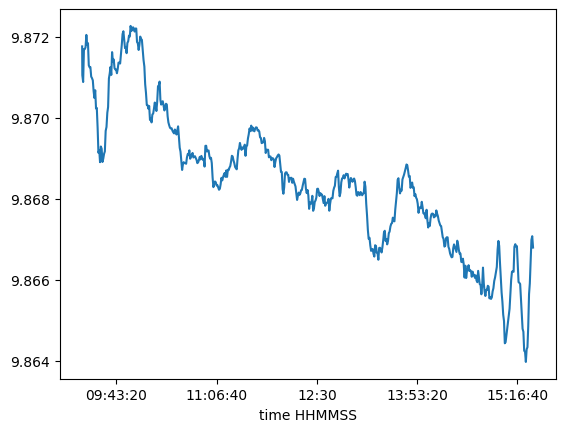

In [6]:
#transform the data to make it stationary
data['Transformed Price'] = np.log(data['Spot price ltp NIFTY50'])
data['Transformed Price'].plot()

In [7]:
def get_stationarity(timeseries):

    # rolling statistics
    rolling_mean = timeseries.rolling(window=8).mean()
    rolling_std = timeseries.rolling(window=8).std()

    # rolling statistics plot
   # original = plt.plot(timeseries, color='blue', label='Original')
    #mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    #std = plt.plot(rolling_std, color='green', label='Rolling STD')
    #plt.legend(loc='best')
    #plt.title('Rolling Mean & Standard Deviation')
    #plt.show(block=False)

    # Dickey–Fuller test:
    result = adfuller(timeseries)
    print('ADF Statistic: {}'.format(result[0]))
    print('p value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

ADF Statistic: -4.391262069143976
p value: 0.0003075821730665929
Critical Values:
	1%: -3.442339408568417
	5%: -2.866828612425054
	10%: -2.5695866531248335


<Axes: xlabel='time HHMMSS'>

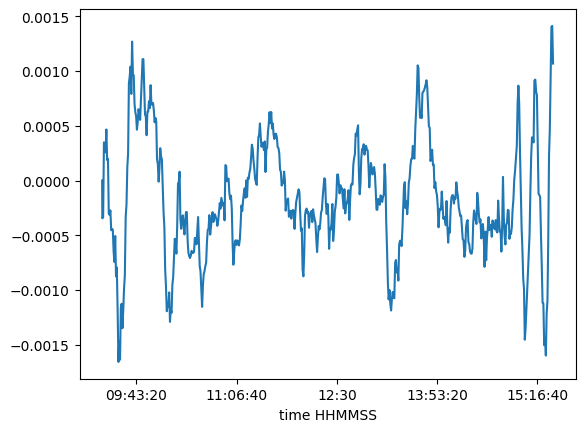

In [8]:
rolling_mean_exp_decay = data['Transformed Price'].ewm(halflife=12, min_periods=0, adjust=True).mean()
df_log_exp_decay = data['Transformed Price'] - rolling_mean_exp_decay
df_log_exp_decay.dropna(inplace=True)
get_stationarity(df_log_exp_decay)
df_log_exp_decay.plot()

In [9]:
pip install pmdarima


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.8 MB/s eta 0:00:00


In [10]:
df_log_exp_decay1=pd.DataFrame(df_log_exp_decay.values, columns=['Transprice'])
df_log_exp_decay1

,Transprice
0,0.000000
1,-0.000345
2,-0.000333
3,0.000349
4,0.000271
...,...
553,0.000472
554,0.000955
555,0.001405
556,0.001412


In [11]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df_log_exp_decay1, trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-8106.674, Time=1.05 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-6841.034, Time=0.14 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-8073.951, Time=0.30 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-6839.031, Time=0.69 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-6791.117, Time=0.12 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-8099.609, Time=0.46 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-8099.699, Time=1.18 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-8105.844, Time=1.10 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-8100.134, Time=3.22 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-8091.064, Time=1.17 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-8105.280, Time=0.83 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-8098.949, Time=1.10 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-6829.012, Time=3.84 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-8107.860, Time=0.44 sec
 ARIMA(1,0,2)(0,0,0

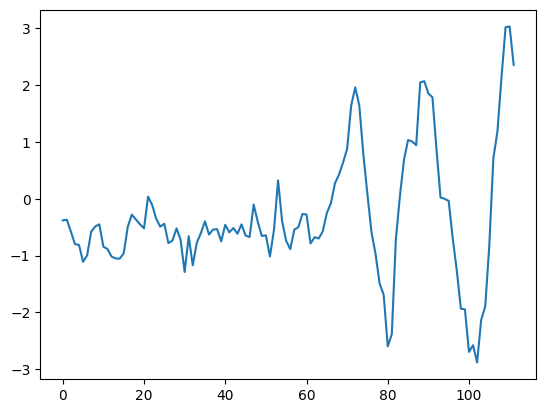

In [12]:
import numpy as np
import pandas as pd
from numpy import math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline
scaler=StandardScaler()
X=df_log_exp_decay1[['Transprice']]


x_train, x_test = train_test_split(X,test_size=0.2, shuffle=False,random_state = 0)
X_train_normalized = scaler.fit_transform(x_train)
X_test_normalized = scaler.transform(x_test)
plt.plot(X_test_normalized)

In [13]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(X, trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-8106.674, Time=1.93 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-6841.034, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-8073.951, Time=0.73 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-6839.031, Time=0.66 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-6791.117, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-8099.609, Time=0.39 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-8099.699, Time=0.66 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-8105.844, Time=0.51 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-8100.134, Time=1.51 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-8091.064, Time=0.68 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-8105.280, Time=1.13 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-8098.949, Time=0.98 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-6829.012, Time=3.66 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-8107.860, Time=0.97 sec
 ARIMA(1,0,2)(0,0,0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


R2 Score(Training):  0.9037688710302262
MSE(Training):  0.08762222995151585
RMSE(Training):  0.29601052337968636


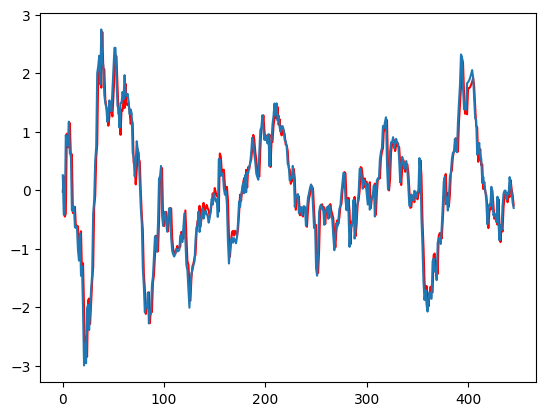

In [14]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(X_train_normalized,order=(2,0,2))
model=model.fit()
model.summary()
plt.plot(model.fittedvalues, color='red')
plt.plot(X_train_normalized)
print("R2 Score(Training): ",r2_score(model.fittedvalues, X_train_normalized))
print("MSE(Training): ",mean_squared_error(model.fittedvalues, X_train_normalized))
print("RMSE(Training): ",np.sqrt(mean_squared_error(model.fittedvalues, X_train_normalized)))



In [15]:
start=len(X_train_normalized)
end=len(X_train_normalized)+len(X_test_normalized)-1
pred=model.predict(start=start,end=end,typ='levels')

print("R2 Score(Testing): ",r2_score(pred, X_test_normalized))
print("MSE(Testing): ",mean_squared_error(pred, X_test_normalized))
print("RMSE(Testing): ",np.sqrt(mean_squared_error(pred, X_test_normalized)))



R2 Score(Testing):  -22.277016984874123
MSE(Testing):  1.209971520165215
RMSE(Testing):  1.0999870545443773


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Actual Vs Predicted Price in Testing Data(ARIMA)')

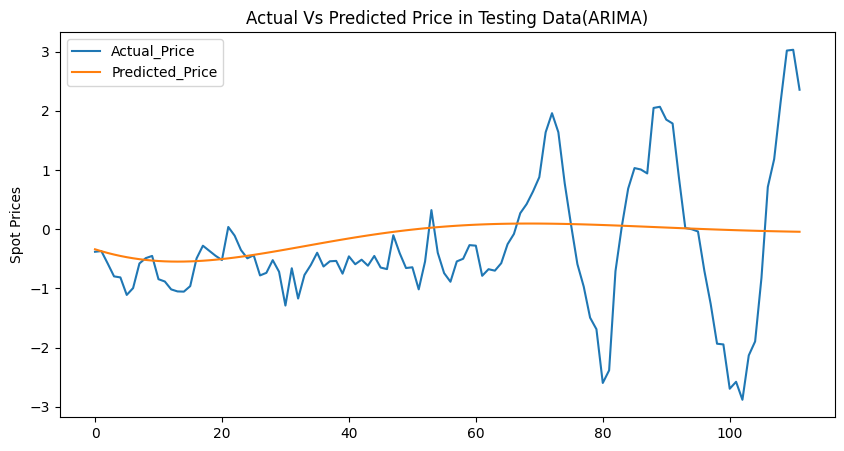

In [16]:
dfr=pd.DataFrame({'Actual_Price':np.ravel(X_test_normalized), 'Predicted_Price':pred})
dfr.loc[:,['Actual_Price','Predicted_Price']].plot( mark_right=False, figsize = (10,5),grid=False)
plt.ylabel("Spot Prices")
plt.title("Actual Vs Predicted Price in Testing Data(ARIMA)")



In [ ]:
# Reconstruct the original data
data[' New Transformed Price'] = rolling_mean_exp_decay[446:] + pred
data[' New Transformed Price']=data[' New Transformed Price'].apply(np.exp)
data

In [ ]:
data[' New Transformed Price']=data[' New Transformed Price'].apply(np.exp)
data


In [41]:
pred_train, pred_test = train_test_split(data[[' New Transformed Price']], test_size=0.2, shuffle=False, random_state=0)
actual_train, actual_test = train_test_split(data[['Spot price ltp NIFTY50']], test_size=0.2, shuffle=False, random_state=0)

In [ ]:
dfr1=pd.DataFrame({'Actual_Price':actual_test.to_list(), 'Predicted_Price':pred_test1})
dfr1.loc[:,['Actual_Price','Predicted_Price']].plot( mark_right=False, figsize = (10,5),grid=False)

plt.ylabel("Spot Prices")
plt.title("Actual Vs Predicted Price in Testing Data(ARIMA)")


In [ ]:
pred_test1=pred_test.values
pred_test1=pred_test1.reshape(112,)
pred_test1

In [71]:
print("R2 Score(Testing): ",r2_score(actual_test, pred_test))
print("MSE(Testing): ",mean_squared_error(actual_test, pred_test))
print("RMSE(Testing): ",np.sqrt(mean_squared_error(actual_test, pred_test)))

R2 Score(Testing):  -86010.30222587394
MSE(Testing):  17088093.452188067
RMSE(Testing):  4133.7747219929715
